In [259]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

In [260]:
df = pd.read_csv(Path('winequality-white.csv'))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [262]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# EXPLORATORY DATA ANALYSIS

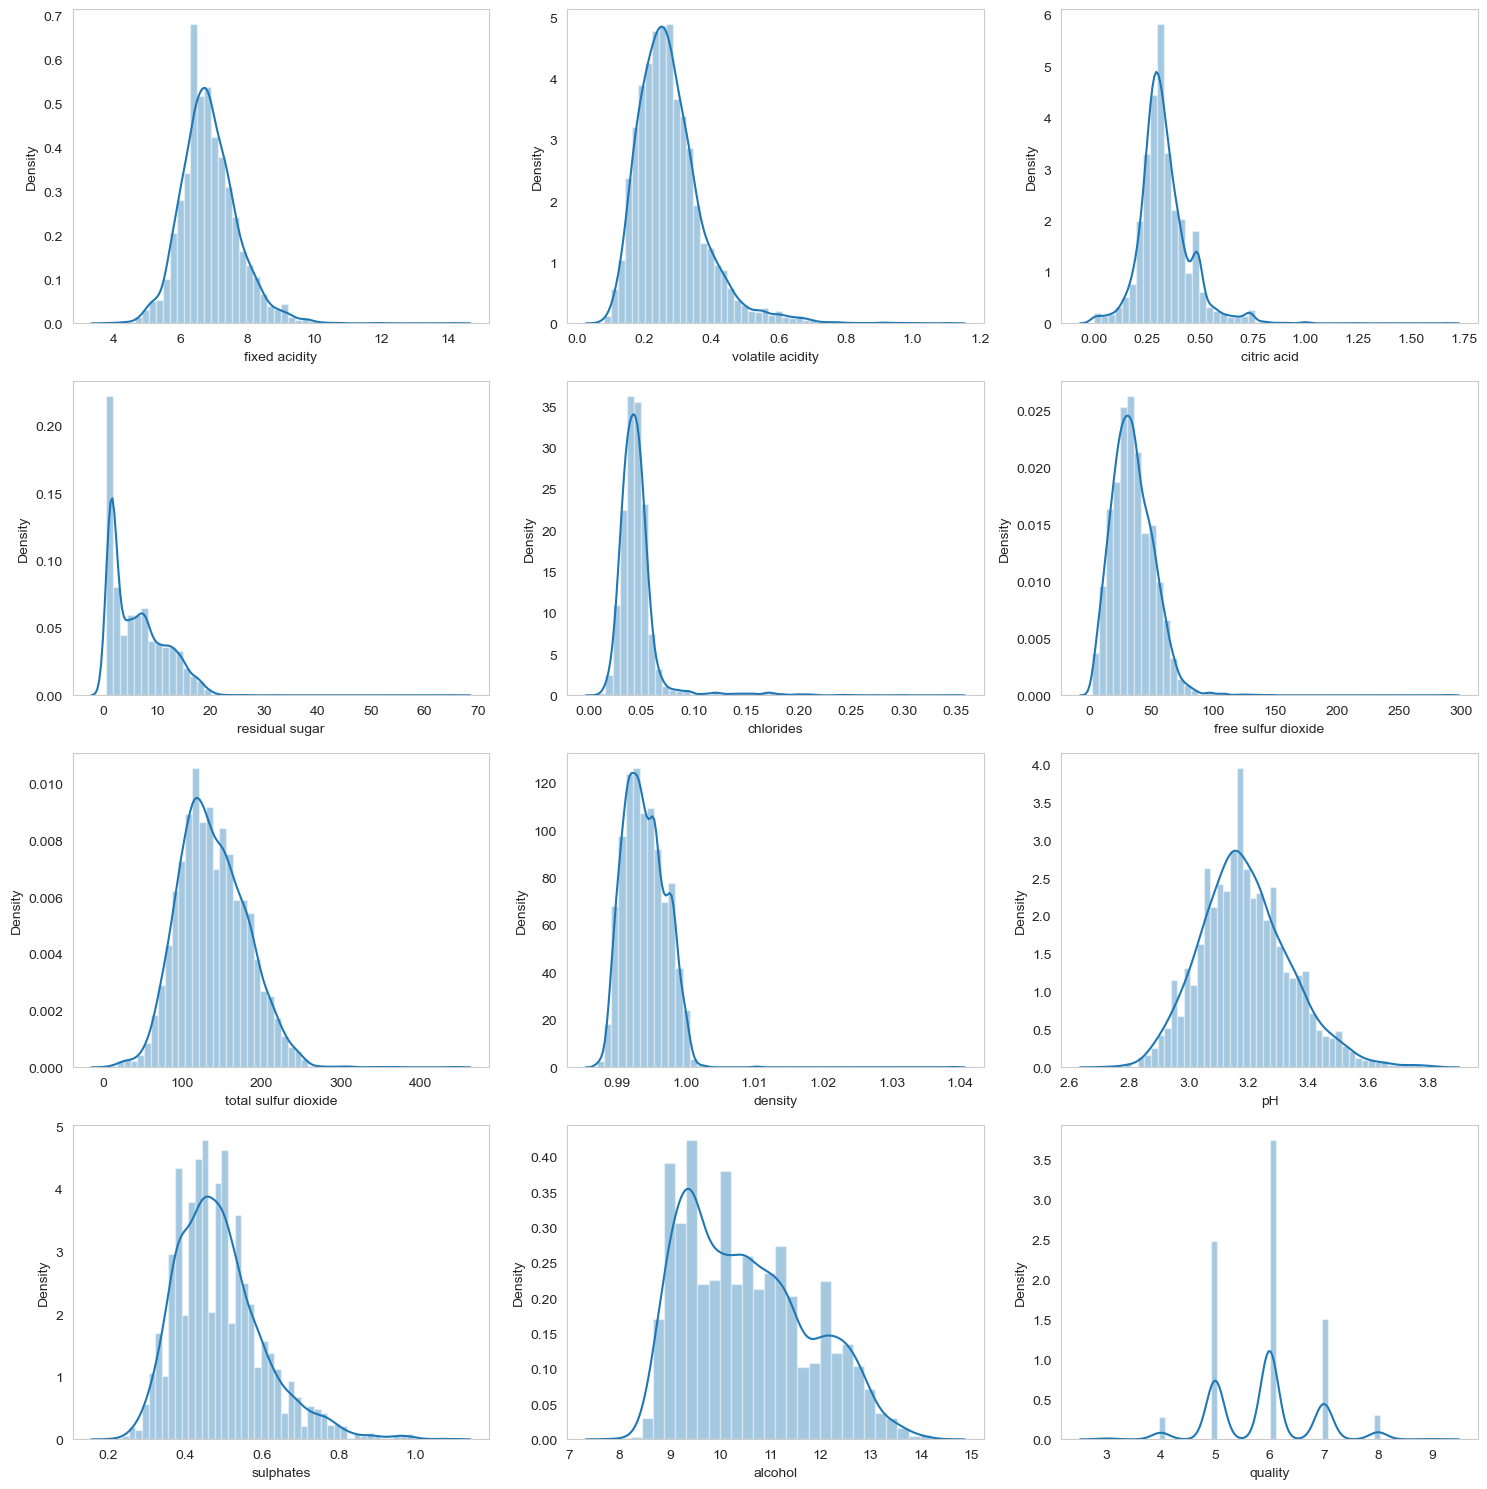

In [263]:
## Picturesque of columns
plt.figure(figsize=(15,15))
plotfig=1

for col in df:
    if plotfig<=12:
        ax=plt.subplot(4, 3, plotfig)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=10)
        
    plotfig+=1
    
plt.tight_layout()
plt.show()

In [264]:
# Check for outliers use box plots to identify outliers
# Remove outliers that are more than 2 standard deviations away from the mean
df = df[(df["quality"] - df["quality"].mean()).abs() < 2 * df["quality"].std()]

<Axes: >

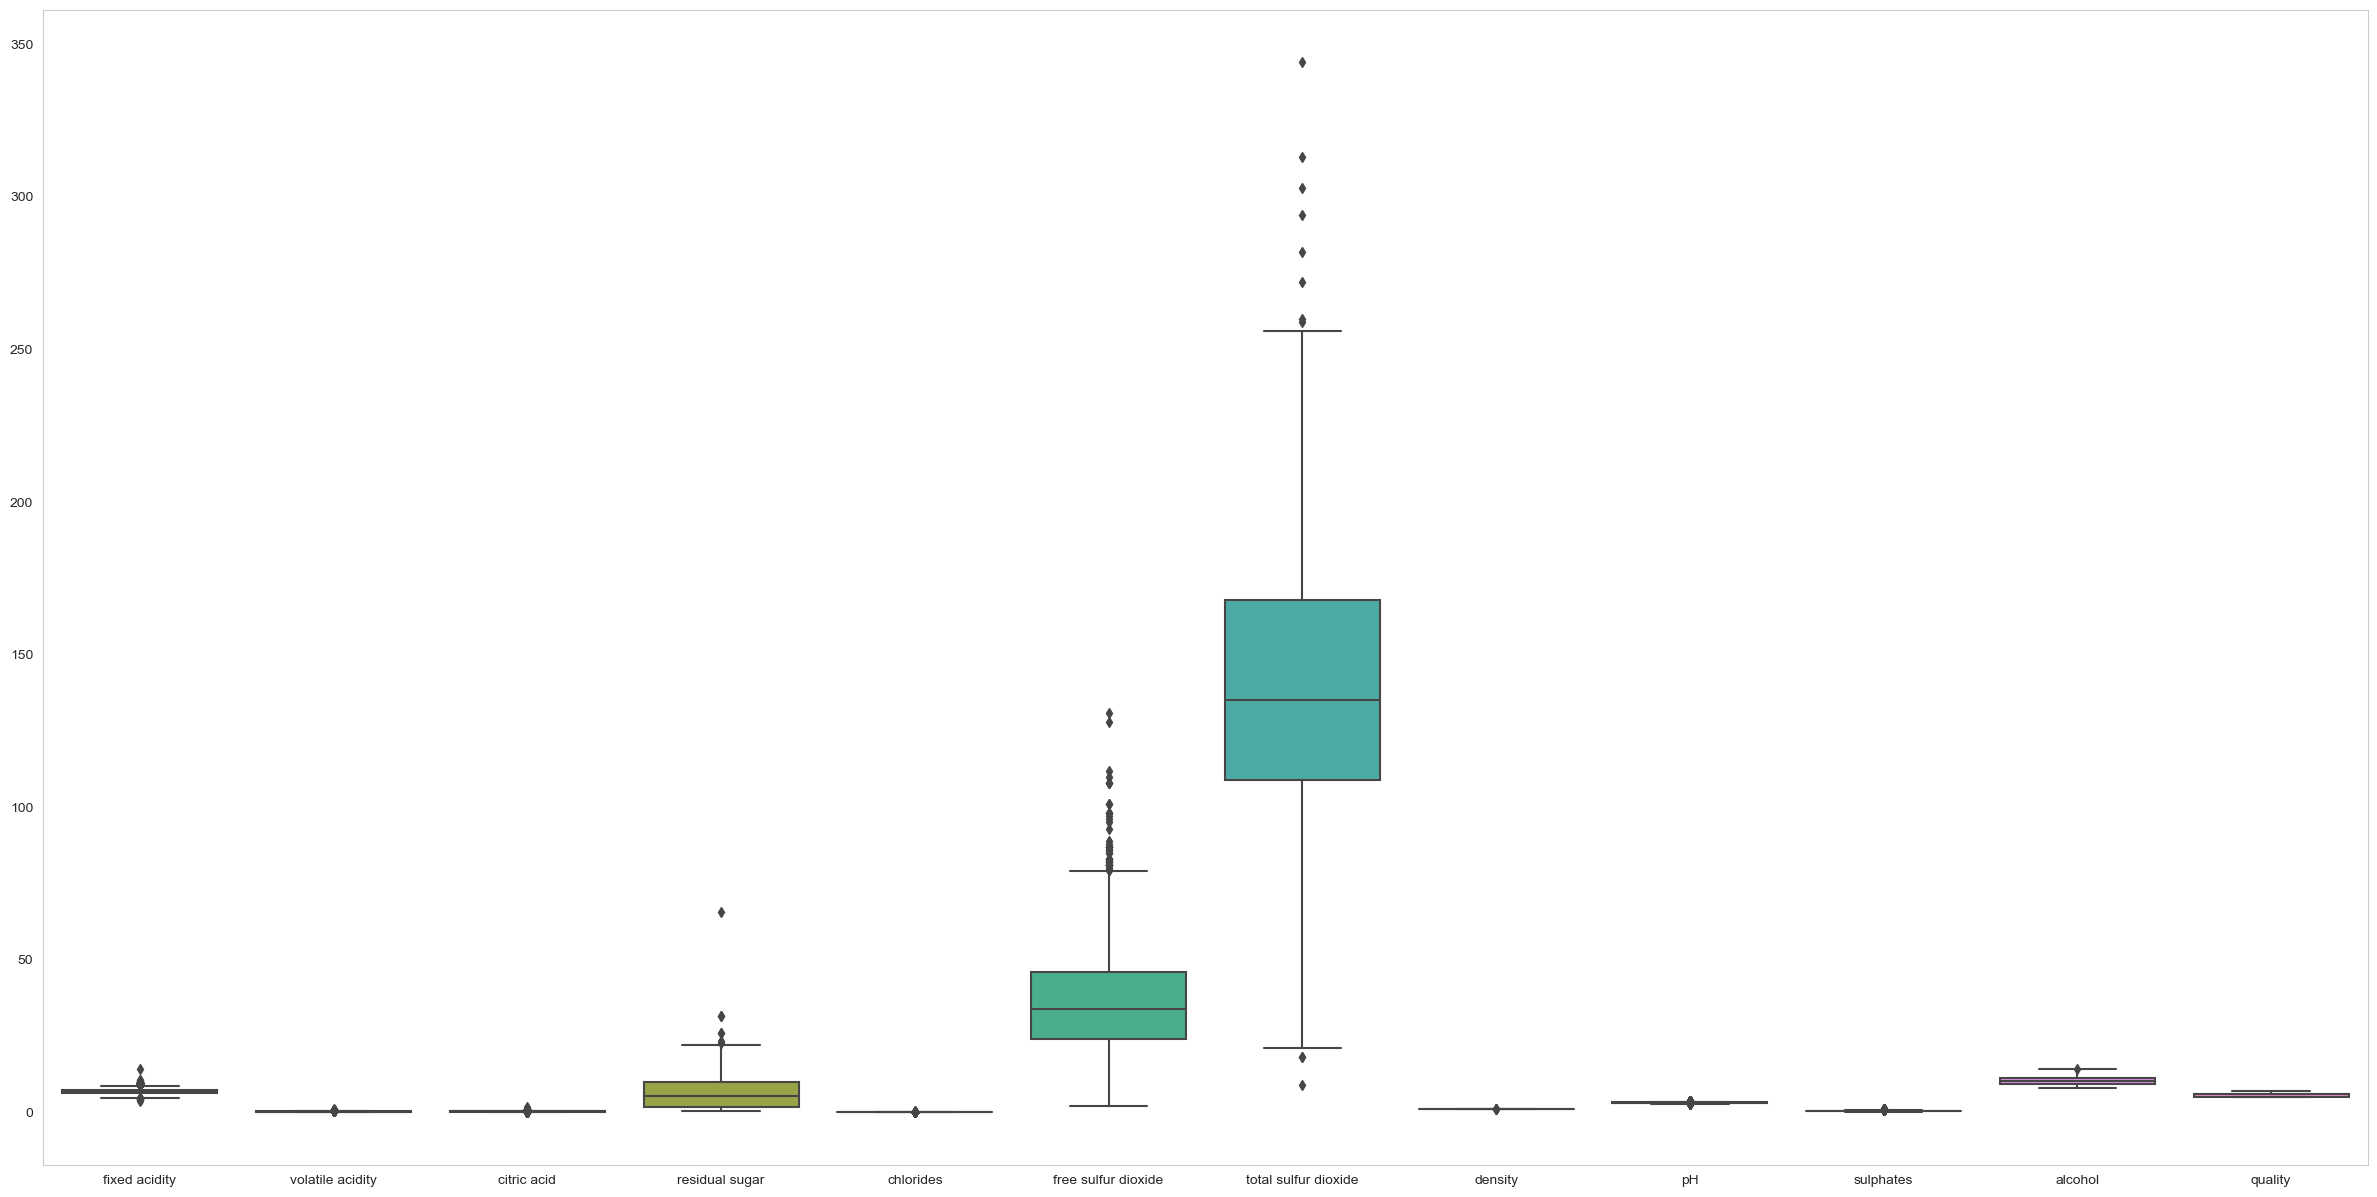

In [265]:
# boxplot for each columns
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

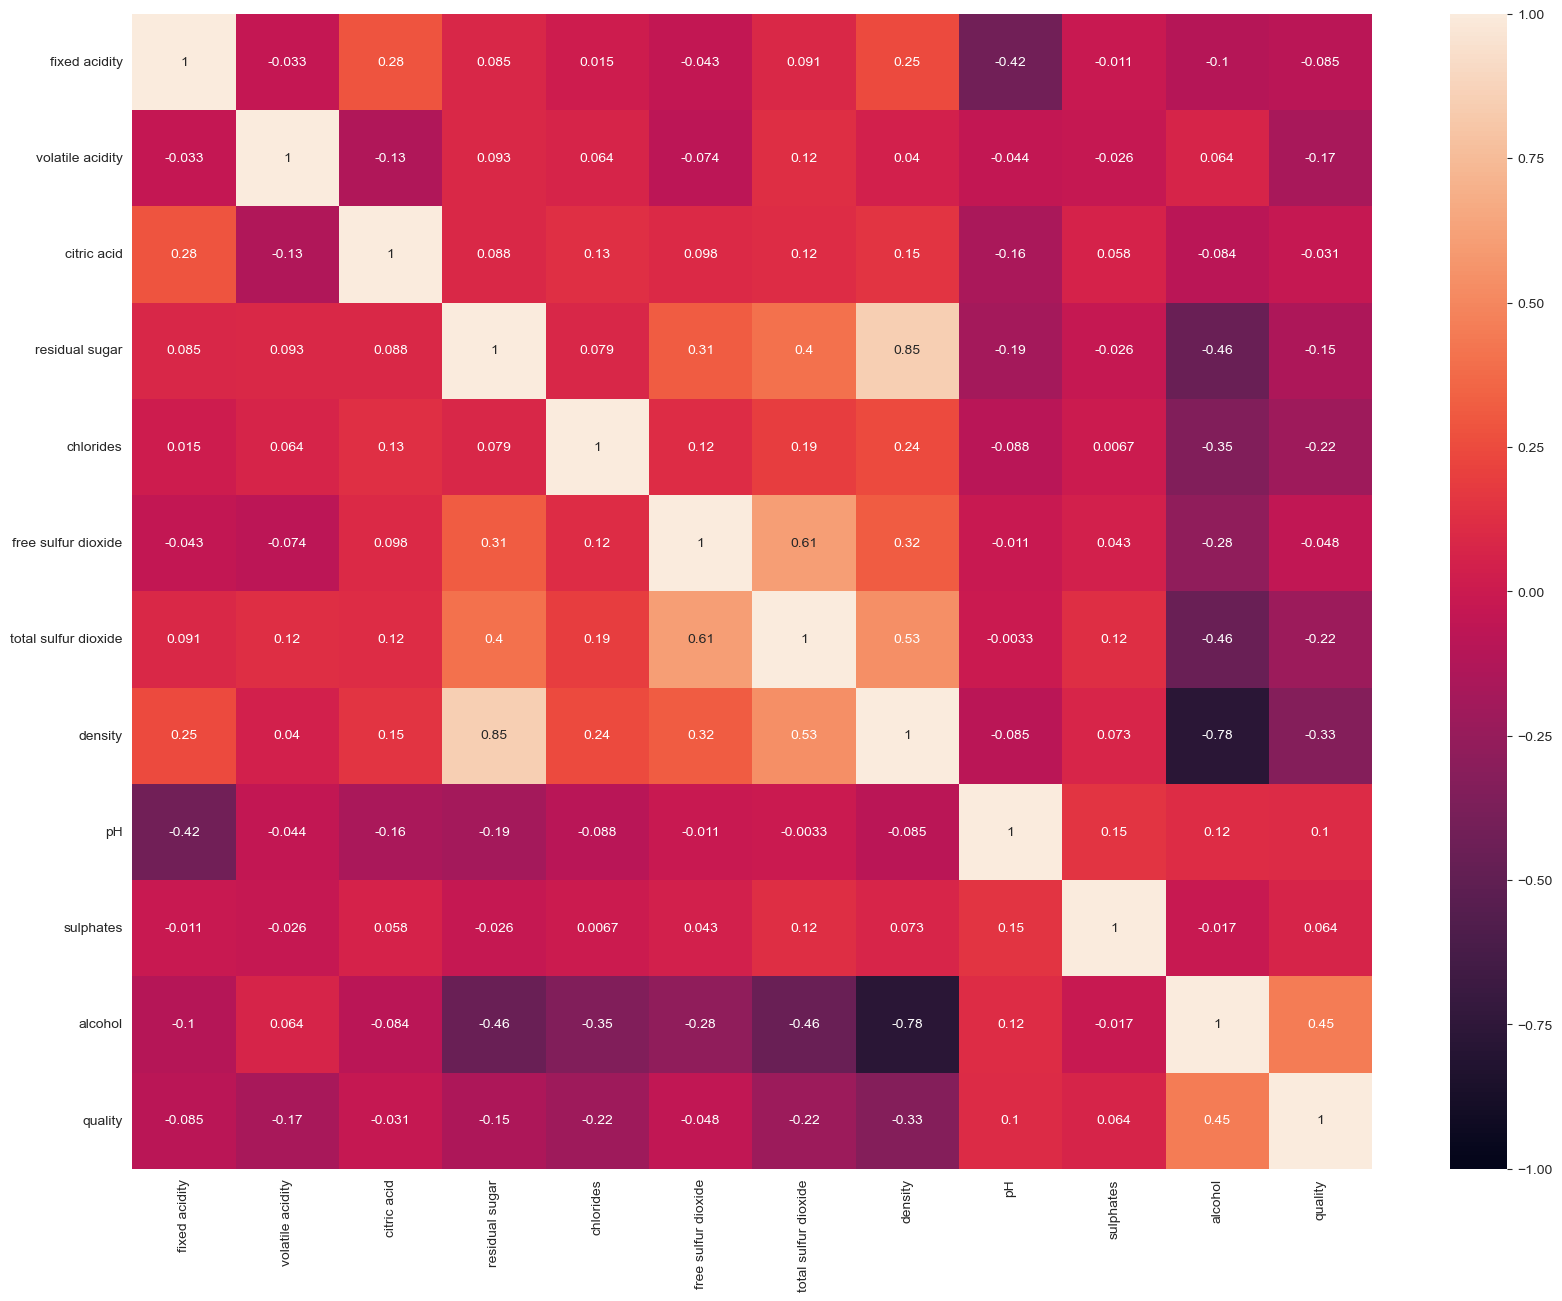

In [266]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

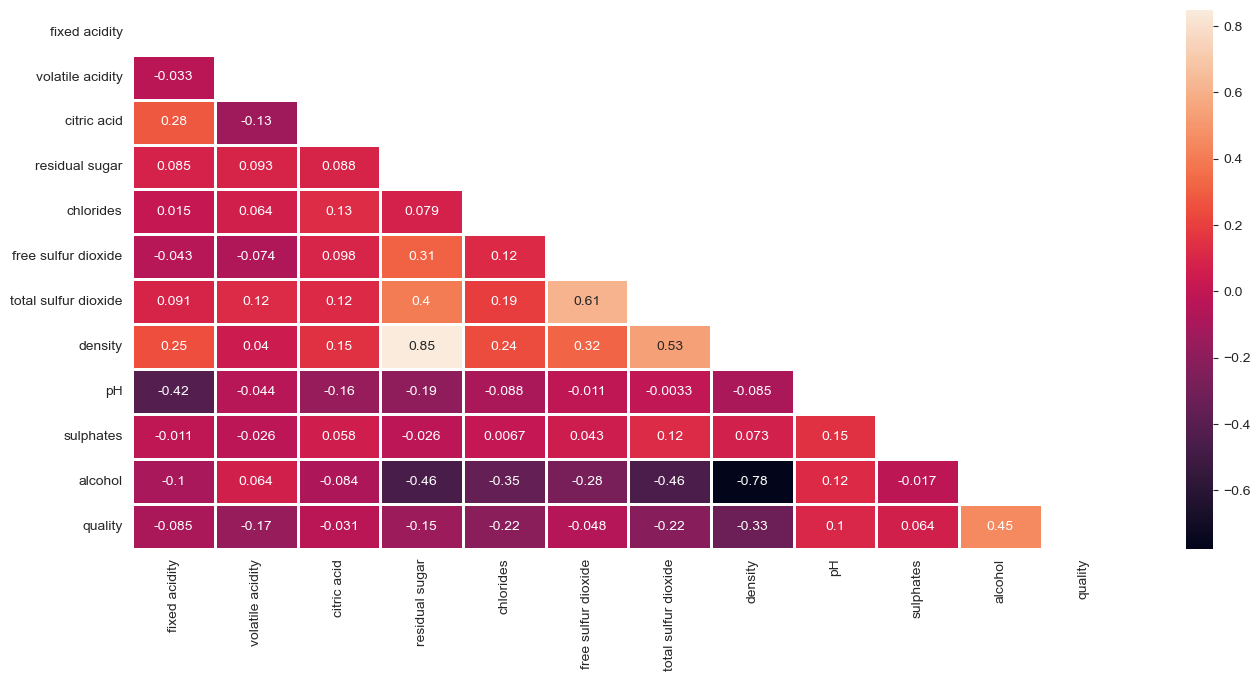

In [267]:
# Heatmap other display
plt.figure(figsize=(16,7))

correlation=df.corr()
mask=np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask ,annot=True, fmt='0.2g', linewidth=1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar
     

In [268]:
## features (X values)
X = df.drop('quality', axis=1)

In [269]:
## target (y)
y = df.iloc[:, -1]

In [270]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [271]:
# View Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3401, 11)
(3401,)
(1134, 11)
(1134,)


In [272]:
# scale data
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

# Implementing Machine Learning Models

In [273]:
# Instantiate Logistic regression
model = LogisticRegression(multi_class='multinomial')

In [274]:
# fit data
lr_model = model.fit(X_train_scaled, y_train)

In [275]:
# Make a prediction using the testing data
pred = model.predict(X_test_scaled)

pd.DataFrame(
    {
        'Prediction' : pred,
        'Actual': y_test
    }
)

,Prediction,Actual
209,5,6
202,5,5
1887,6,5
2126,5,5
1689,6,6
...,...,...
892,5,5
3765,5,5
3847,5,5
2273,5,5


# Logistic Reg Performance Metrics

In [276]:
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_acc_score = accuracy_score(y_test, pred)
print(f'Testing Accuracy Score: {lr_acc_score}')

Testing Accuracy Score: 0.582010582010582


In [277]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.65      0.52      0.58       364
           6       0.56      0.74      0.64       550
           7       0.54      0.29      0.38       220

    accuracy                           0.58      1134
   macro avg       0.58      0.52      0.53      1134
weighted avg       0.59      0.58      0.57      1134



# KNeighborsClassifier

In [278]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [279]:
knn_pred = model.predict(X_test_scaled)

In [280]:
knn_acc_score = accuracy_score(y_test, knn_pred)
print(f'Testing Accuracy Score: {knn_acc_score}')

Testing Accuracy Score: 0.582010582010582


In [281]:
# Calssification Report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           5       0.65      0.52      0.58       364
           6       0.56      0.74      0.64       550
           7       0.54      0.29      0.38       220

    accuracy                           0.58      1134
   macro avg       0.58      0.52      0.53      1134
weighted avg       0.59      0.58      0.57      1134



# Support Vector Classification

In [282]:
# SVC
from sklearn.svm import SVC
mod = SVC()
svc_model = mod.fit(X_train_scaled, y_train)
svc_pred = mod.predict(X_test_scaled)

In [283]:
svc_acc_score = accuracy_score(y_test, svc_pred)
print(f'Testing Accuracy Score: {svc_acc_score}')

Testing Accuracy Score: 0.6287477954144621


In [284]:
# Calssification Report
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           5       0.71      0.60      0.65       364
           6       0.59      0.80      0.68       550
           7       0.66      0.25      0.36       220

    accuracy                           0.63      1134
   macro avg       0.65      0.55      0.56      1134
weighted avg       0.64      0.63      0.61      1134



# Stochastic Gradient Descent

In [285]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [286]:
# best parameter and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.5616077281352423


In [287]:
sgd = SGDClassifier(alpha = 0.1, loss = 'log_loss', penalty = 'l2')
modd = sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)

sgd_acc_score = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy Score: {sgd_acc_score}')


Testing Accuracy Score: 0.5696649029982364


In [288]:
# Calssification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.69      0.42      0.52       364
           6       0.54      0.89      0.67       550
           7       0.88      0.03      0.06       220

    accuracy                           0.57      1134
   macro avg       0.70      0.44      0.42      1134
weighted avg       0.65      0.57      0.50      1134



# Decision Tree

In [289]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
moddtc = dtc.fit(X_train_scaled, y_train)

In [290]:
# accuracy score
predtc = moddtc.predict(X_test_scaled)
dtc_acc_score = accuracy_score(y_test, predtc)
print(f"Testing Accuracy Score:{dtc_acc_score}")

Testing Accuracy Score:0.6111111111111112


In [291]:
# Calssification Report
print(classification_report(y_test, predtc))

              precision    recall  f1-score   support

           5       0.61      0.65      0.63       364
           6       0.64      0.61      0.63       550
           7       0.54      0.55      0.54       220

    accuracy                           0.61      1134
   macro avg       0.60      0.60      0.60      1134
weighted avg       0.61      0.61      0.61      1134



# RandomForest

In [292]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_scaled, y_train)

In [293]:
rf_pred = rf.predict(X_test_scaled)
rf_acc_score = accuracy_score(y_test, rf_pred)
print(f"Testing Accuracy Score: {rf_acc_score}")

Testing Accuracy Score: 0.7116402116402116


In [294]:
# Calssification Report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           5       0.78      0.68      0.73       364
           6       0.67      0.82      0.74       550
           7       0.73      0.49      0.59       220

    accuracy                           0.71      1134
   macro avg       0.73      0.66      0.69      1134
weighted avg       0.72      0.71      0.71      1134



Text(0.5, 1.0, 'Feature Importances')

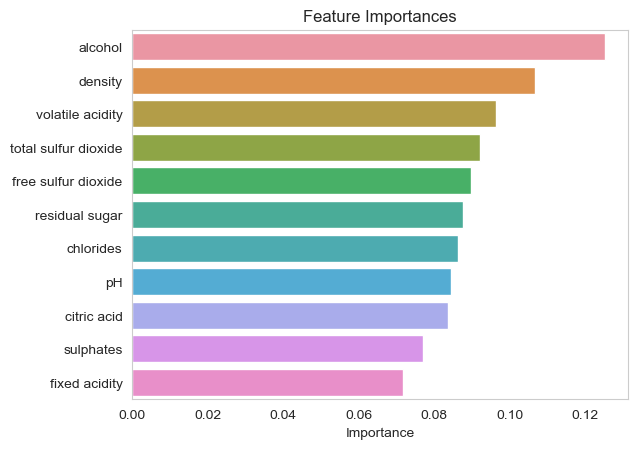

In [295]:
# Calculate the feature importances
important_features = rf.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

# Gradient Boosting Classifier

In [296]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [297]:
# print accuracy score
gb_pred = gb.predict(X_test_scaled)
gb_acc_score = accuracy_score(y_test, gb_pred)
print(f'Testing Accuracy Score: {gb_acc_score}')

Testing Accuracy Score: 0.6208112874779541


In [298]:
# Calssification Report
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           5       0.68      0.57      0.62       364
           6       0.60      0.77      0.67       550
           7       0.62      0.34      0.44       220

    accuracy                           0.62      1134
   macro avg       0.63      0.56      0.58      1134
weighted avg       0.63      0.62      0.61      1134



Text(0.5, 1.0, 'Feature Importances')

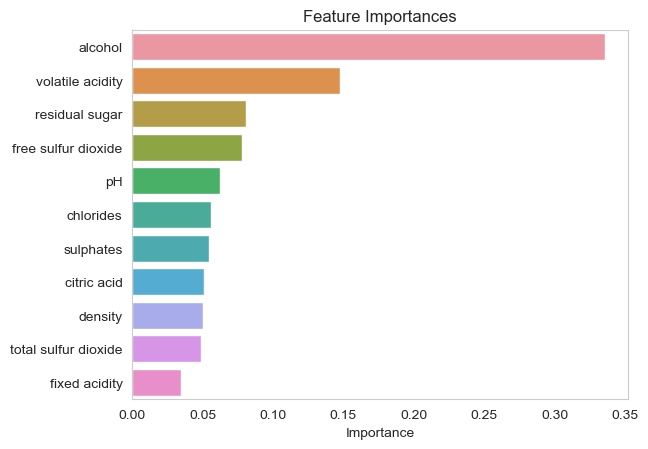

In [299]:
# Calculate the feature importances
important_features = gb.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

# Light Gradient Boosting Machine Classifier

In [300]:
# Model. Fit. Predict
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_acc_score = accuracy_score(y_test, lgbm_pred)
print(f'Testing Accuracy Score: {lgbm_acc_score}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 3401, number of used features: 11
[LightGBM] [Info] Start training from score -1.135143
[LightGBM] [Info] Start training from score -0.724507
[LightGBM] [Info] Start training from score -1.639585
Testing Accuracy Score: 0.6781305114638448


In [301]:
# Calssification Report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           5       0.71      0.66      0.69       364
           6       0.66      0.75      0.70       550
           7       0.66      0.53      0.59       220

    accuracy                           0.68      1134
   macro avg       0.68      0.65      0.66      1134
weighted avg       0.68      0.68      0.68      1134



# CatBoost Classifier

In [302]:
# Model. Fit. Predict
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train_scaled, y_train)
cat_pred = lgbm.predict(X_test_scaled)
cat_acc_score = accuracy_score(y_test, cat_pred)
print(f'Testing Accuracy Score: {cat_acc_score}')

Learning rate set to 0.084224
0:	learn: 1.0708103	total: 7.74ms	remaining: 7.73s
1:	learn: 1.0465192	total: 15.4ms	remaining: 7.69s
2:	learn: 1.0238206	total: 23.1ms	remaining: 7.67s
3:	learn: 1.0066293	total: 29.2ms	remaining: 7.28s
4:	learn: 0.9903919	total: 37.1ms	remaining: 7.39s
5:	learn: 0.9756644	total: 43.3ms	remaining: 7.18s
6:	learn: 0.9622860	total: 49ms	remaining: 6.95s
7:	learn: 0.9492932	total: 56.6ms	remaining: 7.01s
8:	learn: 0.9396220	total: 64.2ms	remaining: 7.07s
9:	learn: 0.9313738	total: 70.9ms	remaining: 7.02s
10:	learn: 0.9211483	total: 77.1ms	remaining: 6.93s
11:	learn: 0.9116014	total: 86.1ms	remaining: 7.09s
12:	learn: 0.9042302	total: 93.5ms	remaining: 7.1s
13:	learn: 0.8952271	total: 101ms	remaining: 7.09s
14:	learn: 0.8870503	total: 107ms	remaining: 7.04s
15:	learn: 0.8814561	total: 115ms	remaining: 7.09s
16:	learn: 0.8753959	total: 121ms	remaining: 7.02s
17:	learn: 0.8695055	total: 128ms	remaining: 6.96s
18:	learn: 0.8637469	total: 134ms	remaining: 6.91s
1

In [303]:
# Calssification Report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           5       0.71      0.66      0.69       364
           6       0.66      0.75      0.70       550
           7       0.66      0.53      0.59       220

    accuracy                           0.68      1134
   macro avg       0.68      0.65      0.66      1134
weighted avg       0.68      0.68      0.68      1134



In [304]:
# models in dataframe
models = pd.DataFrame(
    {
        'Model' : ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'LGBM', 'Cat Boost'],
        'Score': [lr_acc_score, knn_acc_score, svc_acc_score, dtc_acc_score, rf_acc_score, gb_acc_score, lgbm_acc_score, cat_acc_score]
    }
)
models.sort_values(by = 'Score', ascending= False)

,Model,Score
4,Random Forest,0.711640
6,LGBM,0.678131
7,Cat Boost,0.678131
2,SVC,0.628748
5,Gradient Boosting,0.620811
3,Decision Tree,0.611111
0,Logistic Regression,0.582011
1,KNN,0.582011


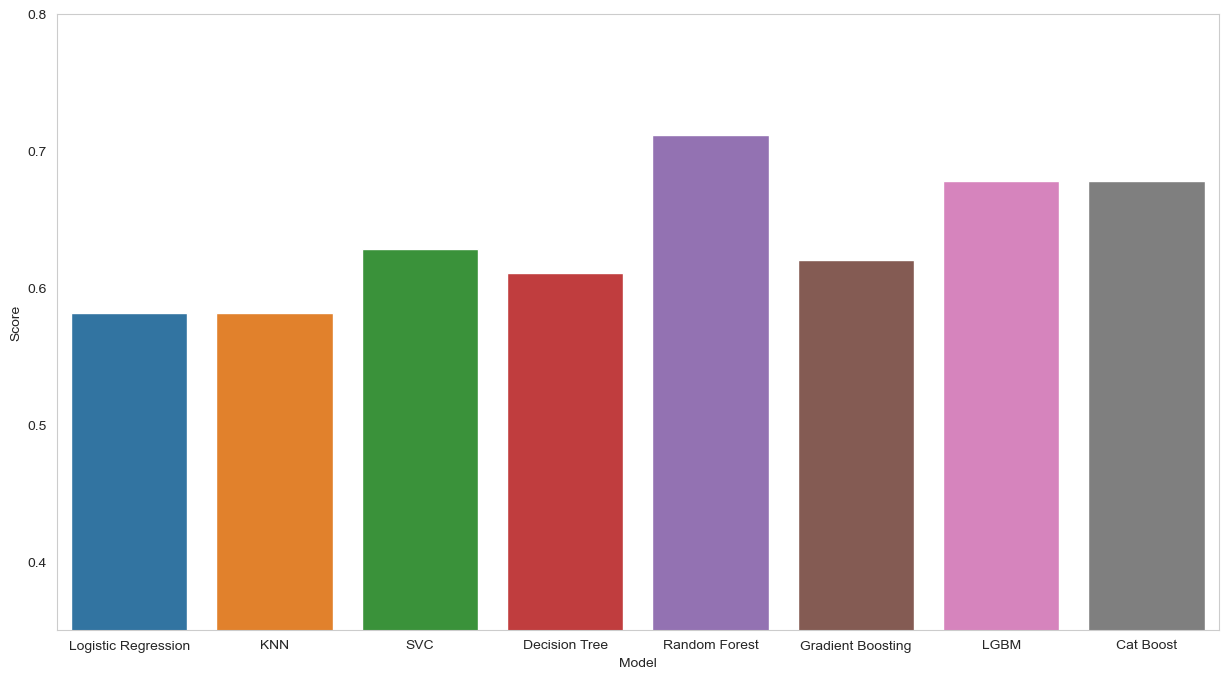

In [305]:
plt.figure(figsize = (15, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.35, 0.80)
plt.show()

In [306]:
import pickle

In [307]:
filename = 'wwine_quality.sav'
pickle.dump(lr_model, open(filename, 'wb'))